# Welcome

# Predicting the price of house based on certain features.

# Data

**Notes on Specific Variables**

**Rooms** : Number of rooms

**Price** : Price in dollars

**Suburb** : The residential area on the outskirts of a city or large town.

**Method** : 

S - property sold;

 SP - property sold prior; 

 PI - property passed in; 

 PN - sold prior not disclosed;

 SN - sold not disclosed; 

 NB - no bid;

 VB - vendor bid;

 W - withdrawn prior to auction;

 SA - sold after auction;

 SS - sold after auction price not disclosed.

 N/A - price or highest bid not available.

**Type** :

 br - bedroom(s);

 h - house,cottage,villa, semi,terrace;

 u - unit, duplex;

 t - townhouse;

 dev site - development site; 

 o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

**You can find our blog link [here](https://abhishekgera2001.medium.com/predicting-house-price-with-random-forest-regressor-6e9a7c7f75dd)**

**Code**

**Importing Libraries**

In [1]:
# importing Required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

**Importing Data set**

The following command imports the CSV dataset via pandas:

In [2]:
df = pd.read_csv("../input/dataset/melb_data.csv")

**Understand the Data**

Now let’s explore the dataset. Execute the following script: df.shape

In [3]:
df.shape

(13580, 21)

**The dataset contain 13,580 rows and 21 columns. Let’s take a look at what our dataset actually looks like. enter the df.head() which will retrieves the first 5 records from our dataset.**

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**To see data types of features :**

In [5]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

**To see statistical details of the dataset, we can use df.describe() :**

In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


**Data cleaning**

In [7]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

**We can see there are missing values present in features like Car , BuildingArea , YearBuilt , CouncilArea**

**For Feature Car :**

<AxesSubplot:xlabel='Car', ylabel='Price'>

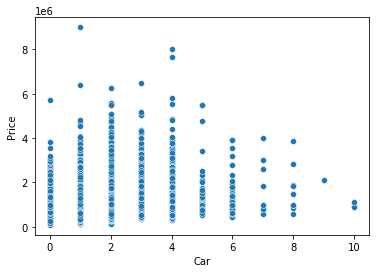

In [8]:
sns.scatterplot(x = df["Car"],y = df["Price"])
# sns.boxplot(data=df["Car"])

In [9]:
df["Car"].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

**For BuildingArea**

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

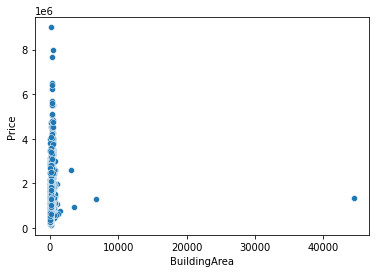

In [10]:
# sns.boxplot(data = df["BuildingArea"])
sns.scatterplot(x = df["BuildingArea"],y = df["Price"])

In [11]:
df["BuildingArea"].value_counts()

120.00    114
110.00     89
100.00     88
130.00     84
115.00     77
         ... 
477.00      1
426.00      1
366.00      1
446.00      1
118.54      1
Name: BuildingArea, Length: 602, dtype: int64

**For YearBuilt**

<AxesSubplot:>

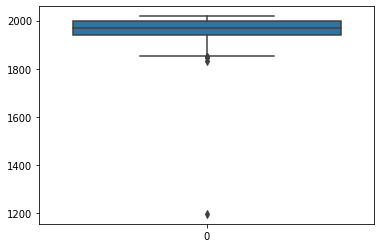

In [12]:
sns.boxplot(data = df["YearBuilt"])
# sns.scatterplot(x = df["YearBuilt"],y = df["Price"])

**For CouncilArea**

In [13]:
df["CouncilArea"].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Maroondah              80
Knox                   80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: CouncilArea, dtype: int64

**By seeing the graphs we can fill the missing values with forward values or backward values as they are in either increasing order or decreasing order continuously**

In [14]:
df = df.fillna(method='ffill').fillna(method='bfill')

**Feature Selection :**

<AxesSubplot:xlabel='Lattitude', ylabel='Price'>

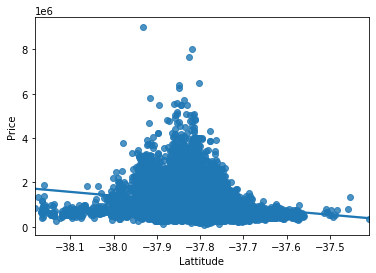

In [15]:
sns.regplot(x = df["Lattitude"],y = df["Price"])

In [16]:
corr, _ = spearmanr(df["Lattitude"], df["Price"])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.260


**As we see Latitude feature is negatively correlated to Target feature so we remove it.**

<AxesSubplot:xlabel='Longtitude', ylabel='Price'>

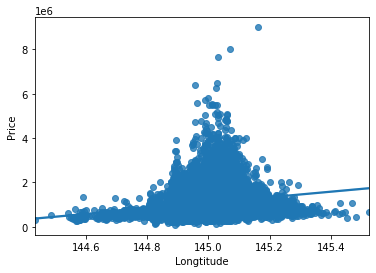

In [17]:
sns.regplot(x = df["Longtitude"],y = df["Price"])

In [18]:
corr, _ = spearmanr(df["Longtitude"], df["Price"])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.262


**As we can see Date is not related to house price so we can delete it.**

In [19]:
del df["Lattitude"]
del df["Longtitude"]
del df["Date"]

In [20]:
df[df.columns[:]].corr()['Price'][:]

Rooms            0.496634
Price            1.000000
Distance        -0.162522
Postcode         0.107867
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238302
Landsize         0.037507
BuildingArea     0.078818
YearBuilt       -0.214390
Propertycount   -0.042153
Name: Price, dtype: float64

**Applying machine learning algorithm**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

**Choosing the target variable**

In [22]:
y = df["Price"]
del df["Price"]

In [23]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Method            object
SellerG           object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Regionname        object
Propertycount    float64
dtype: object

**Performing one hot encoding for categorical features.**

In [24]:
df["Suburb"] = pd.get_dummies(df["Suburb"])
df["Address"] = pd.get_dummies(df["Address"])
df["Method"] = pd.get_dummies(df["Method"])
df["SellerG"] = pd.get_dummies(df["SellerG"])
df["Regionname"] = pd.get_dummies(df["Regionname"])
df["CouncilArea"] = pd.get_dummies(df["CouncilArea"])
df["Type"] = pd.get_dummies(df["Type"])

**Chossing features for predicting target variable**

In [25]:
x = df

**Dividing our data into train and test data so we can train our model with training data and test our model with testing data**

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

**Using RandomForestRegressor, we are using it because we are predicting a continuous value so we are applying it.**

In [27]:
model = RandomForestRegressor(max_depth=13, random_state=0)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=13, random_state=0)

**Predicting the data using the model**

In [28]:
y_pred = model.predict(x_test)

**Evaluating the model using performance measures.**

In [29]:
print(metrics.r2_score(y_test,y_pred))

0.7853700736976467


# Medium Blog Link
https://abhishekgera2001.medium.com/predicting-house-price-with-random-forest-regressor-6e9a7c7f75dd